In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
53,426 cases (7 day average) as of Tue 14 Dec, +5,177.7 since Mon 13 Dec
770 hospitalised (7 day average) as of Wed 15 Dec, +0.0 since Wed 15 Dec
87 died (7 day average) as of Tue 14 Dec, +1.0 since Mon 13 Dec


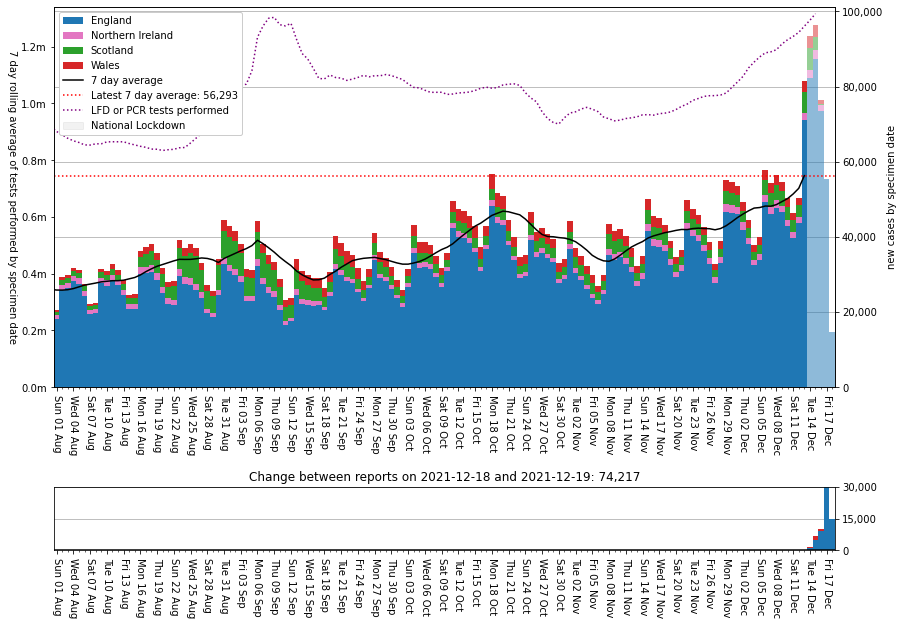

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08')

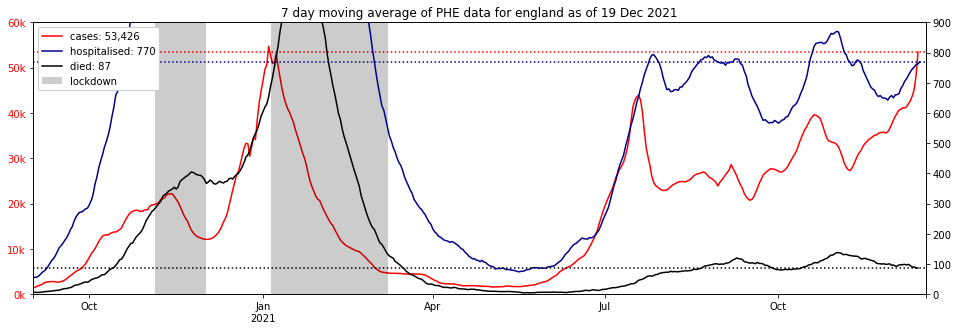

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=60_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

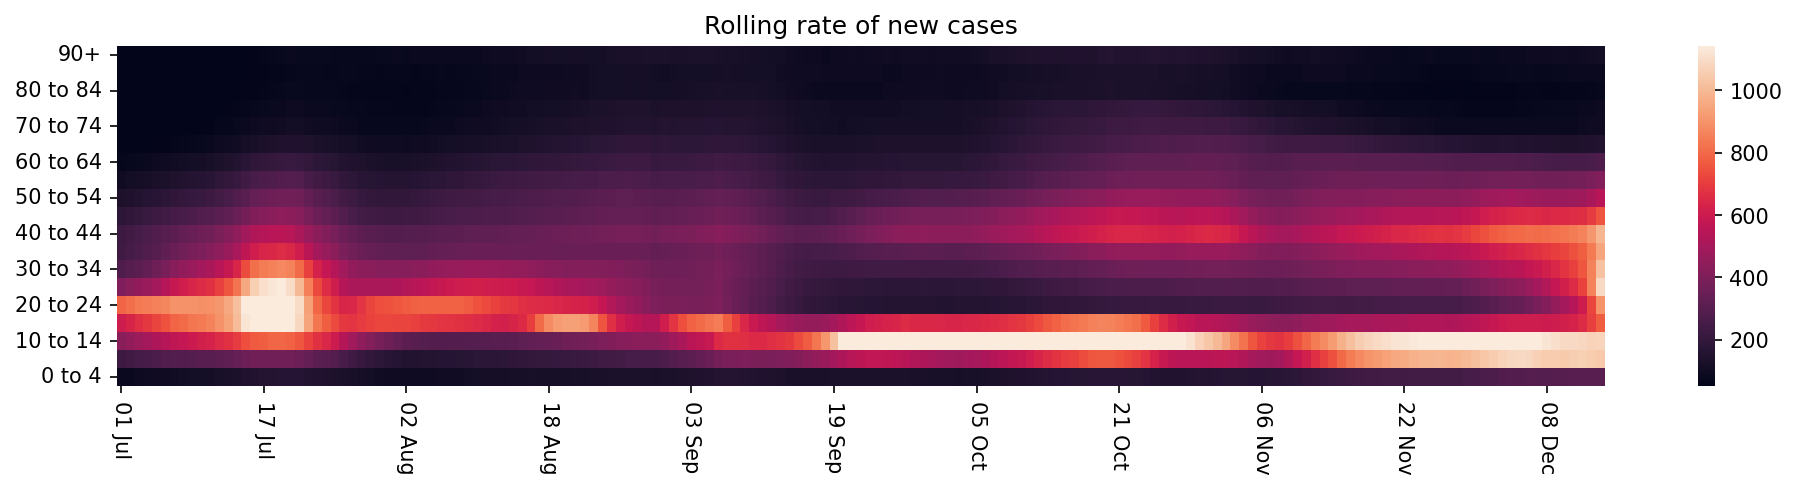

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

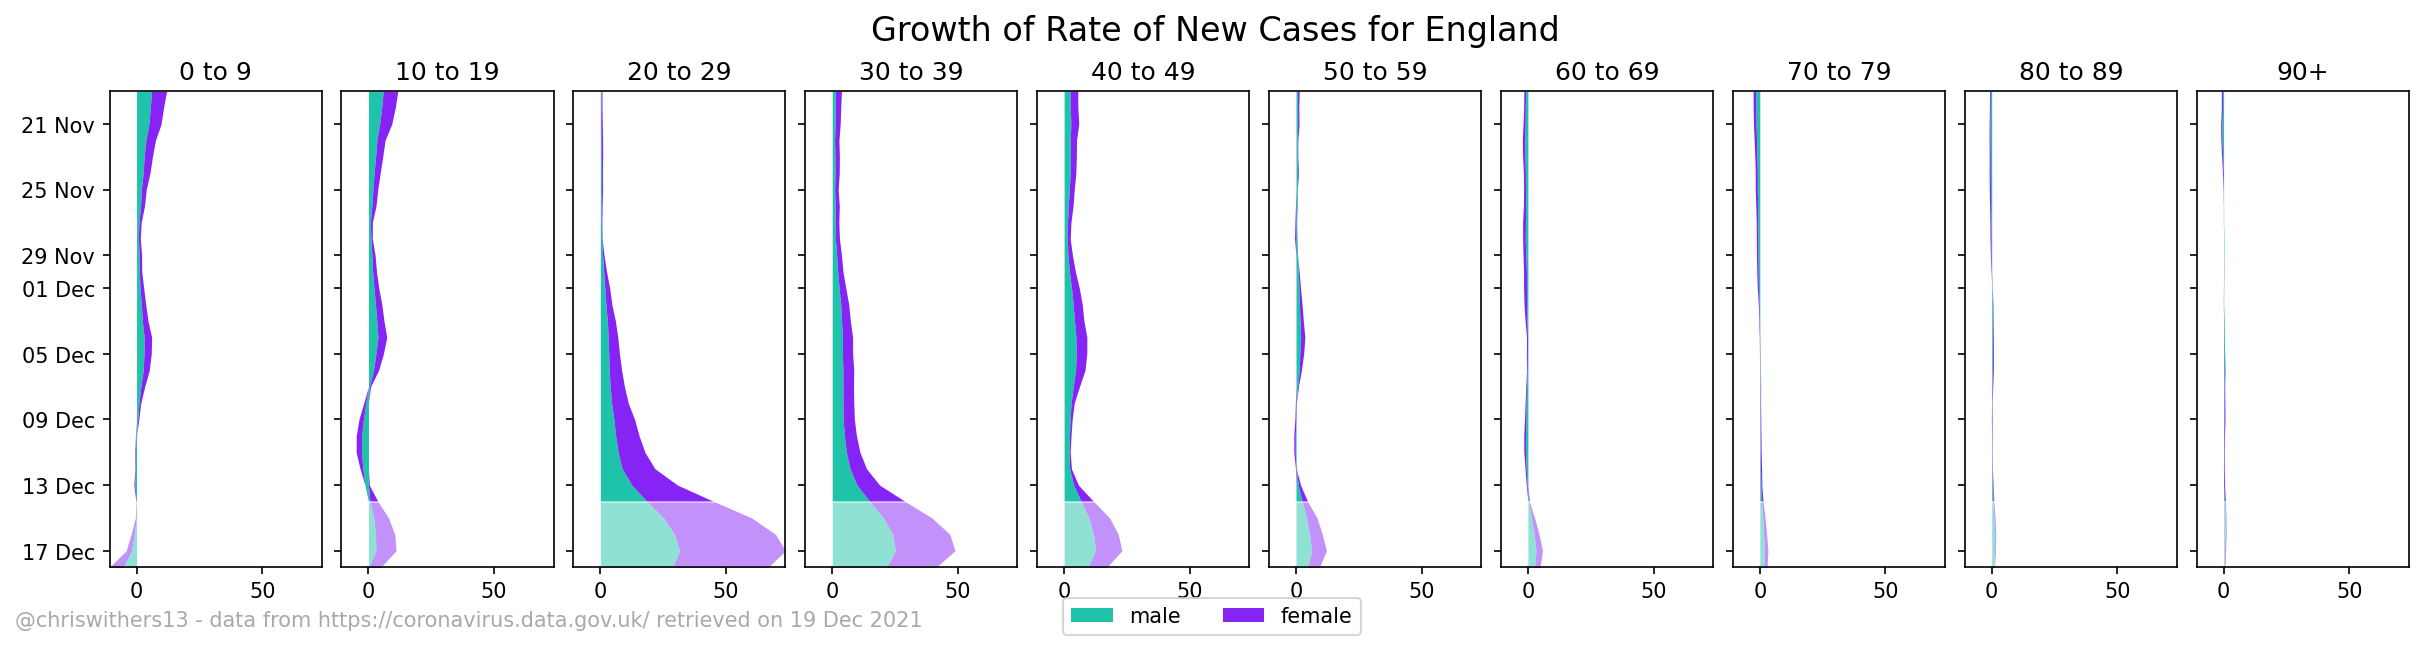

In [6]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

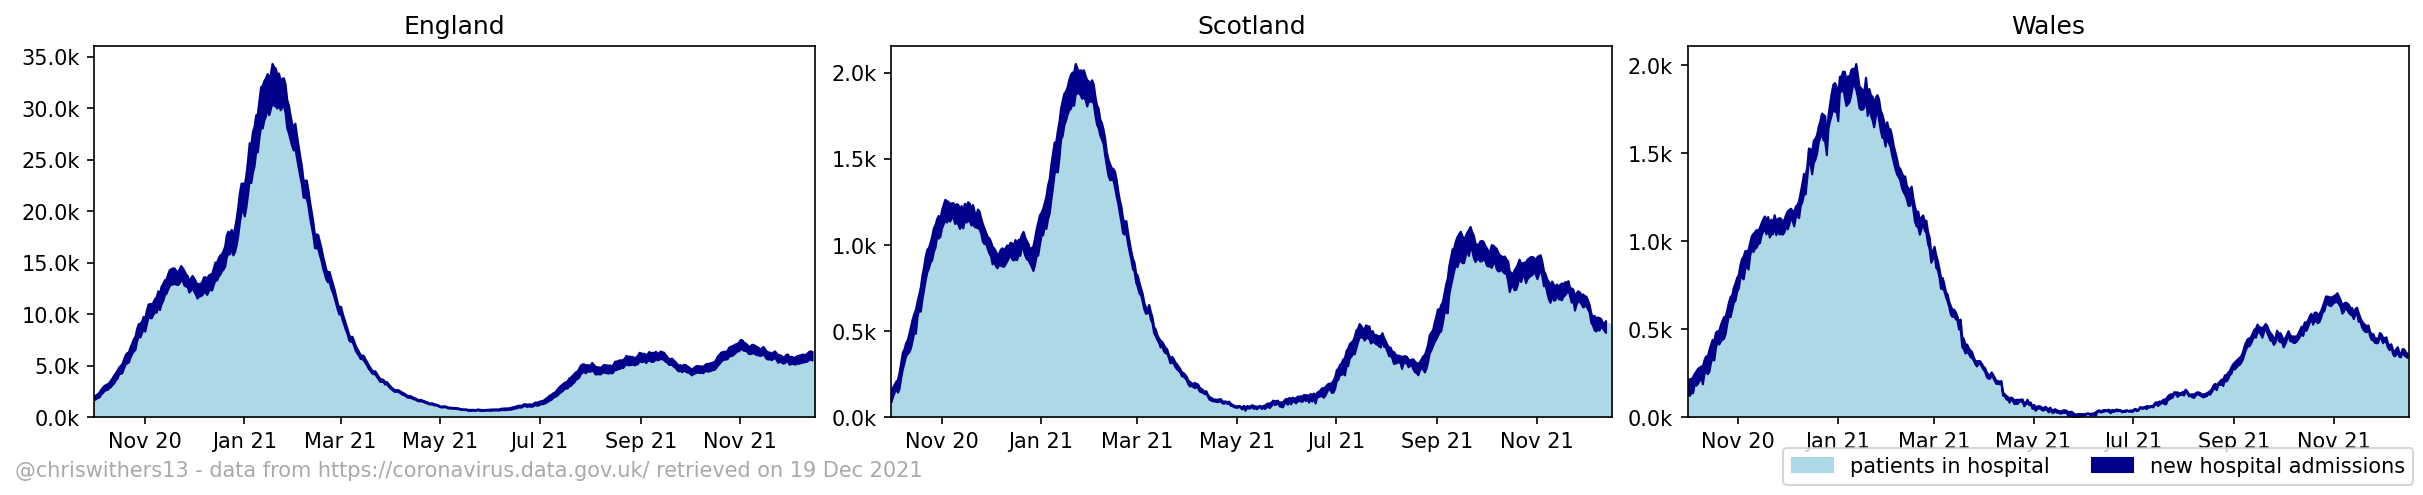

In [7]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

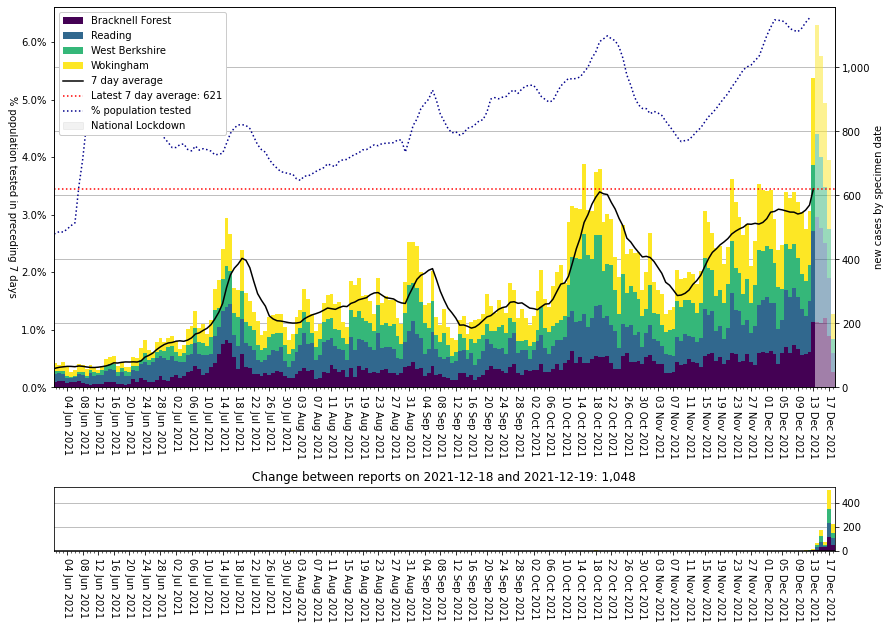

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

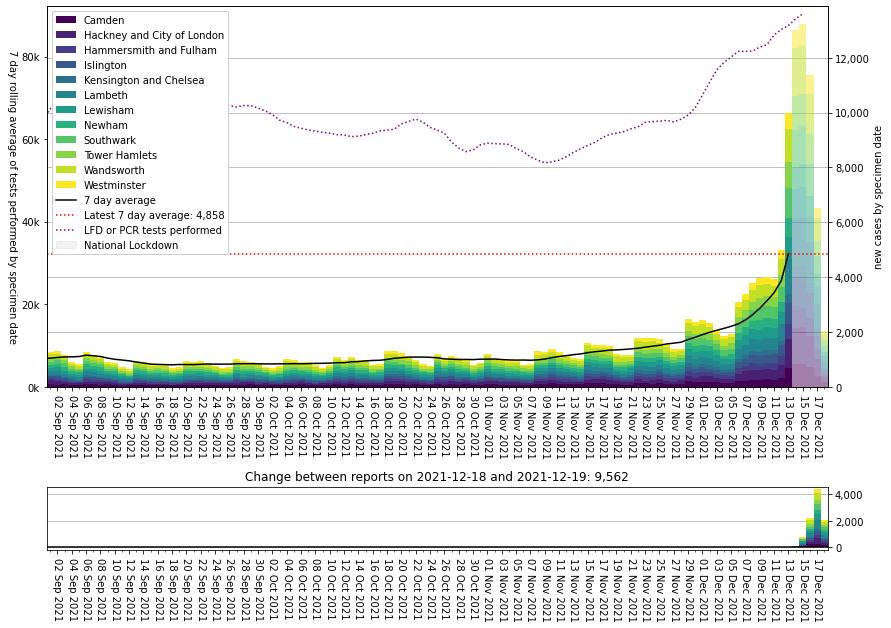

In [9]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                    
E09000022                     Lambeth         2466.307195   
E09000032                  Wandsworth         2389.914977   
E09000012  Hackney and City of London         2107.336999   
E09000028                   Southwark         2019.571559   
E09000019                   Islington         1965.628312   
E09000013      Hammersmith and Fulham         1892.051009   
E09000030               Tower Hamlets         1728.125144   
E09000023                    Lewisham         1711.014184   
E09000024                      Merton         1582.198811   
E09000014                    Haringey         1565.623290   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E09000022                  8041.0    2021-12-18  
E09000032                  7879.0    2021-12-18  
E09000012                  6129.0    2021-12-18  
E09000028                  6439.0    2021-12-18  
E09000019                  4766.0    2021-12-18  
E09000013                  3503.0    2021-12-18  
E09000030                  5612.0    2021-12-18  
E09000023                  5233.0    2021-12-18  
E09000024                  3268.0    2021-12-18  
E09000014                  4206.0    2021-12-18

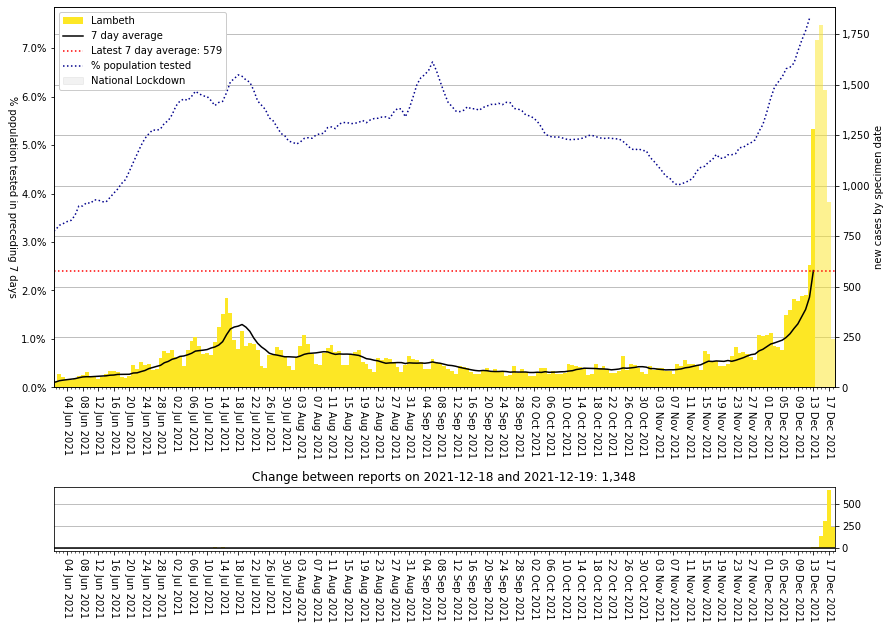

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                    
E09000022                     Lambeth         2466.307195   
E09000032                  Wandsworth         2389.914977   
E09000028                   Southwark         2019.571559   
E09000012  Hackney and City of London         2107.336999   
E09000030               Tower Hamlets         1728.125144   
E09000023                    Lewisham         1711.014184   
E08000025                  Birmingham          450.335255   
E09000008                     Croydon         1294.768690   
E09000019                   Islington         1965.628312   
E08000003                  Manchester          858.990916   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E09000022                  8041.0    2021-12-18  
E09000032                  7879.0    2021-12-18  
E09000028                  6439.0    2021-12-18  
E09000012                  6129.0    2021-12-18  
E09000030                  5612.0    2021-12-18  
E09000023                  5233.0    2021-12-18  
E08000025                  5142.0    2021-12-18  
E09000008                  5007.0    2021-12-18  
E09000019                  4766.0    2021-12-18  
E08000003                  4749.0    2021-12-18

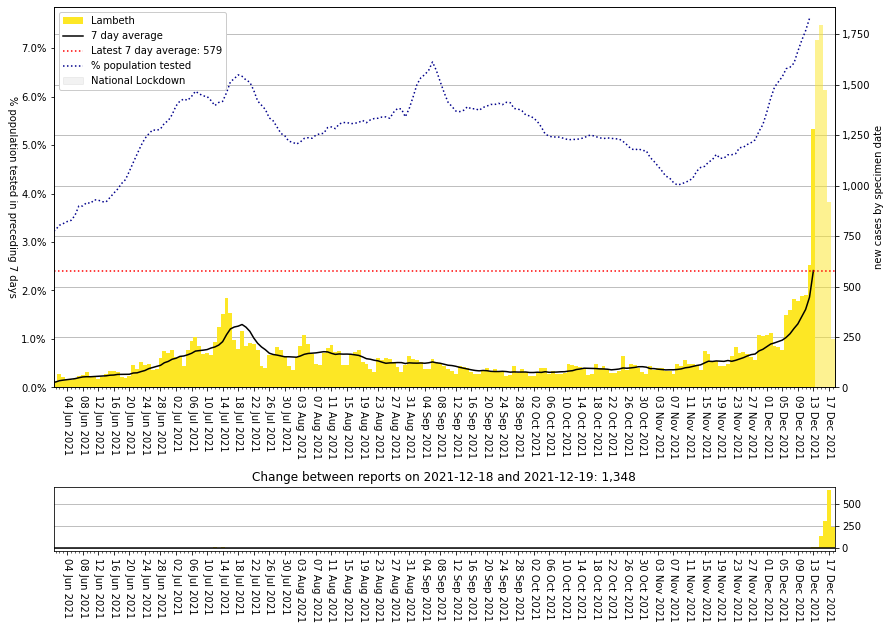

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

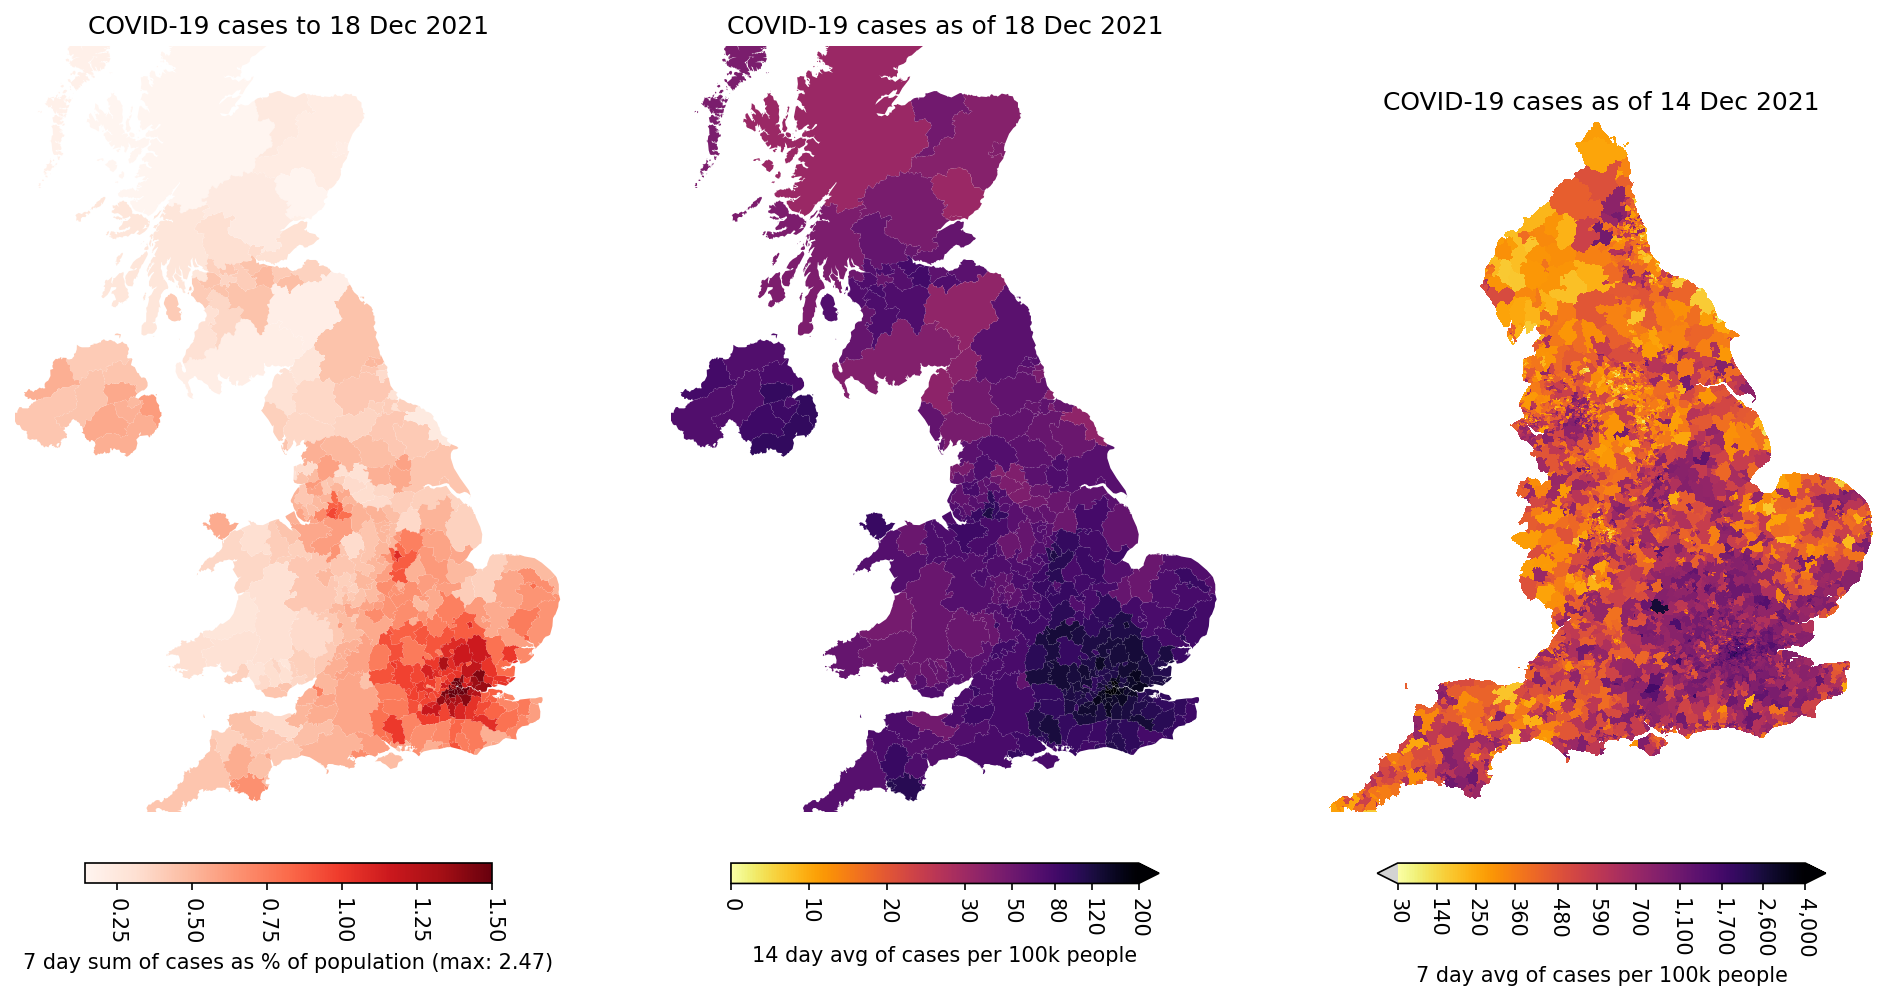

Loading BokehJS ...

In [15]:
case_maps(for_date, sum_vmax=1.5)

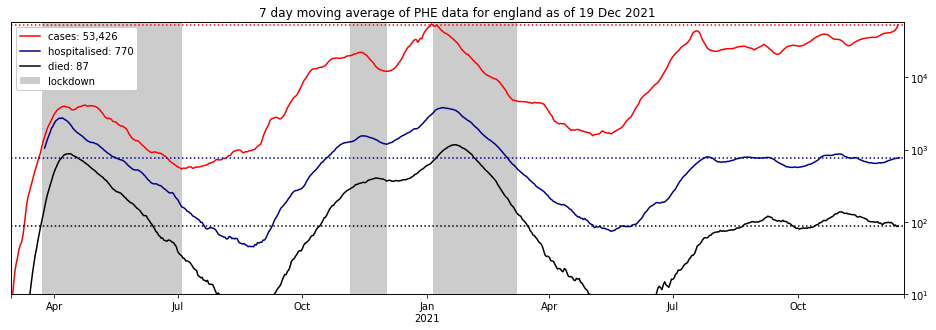

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

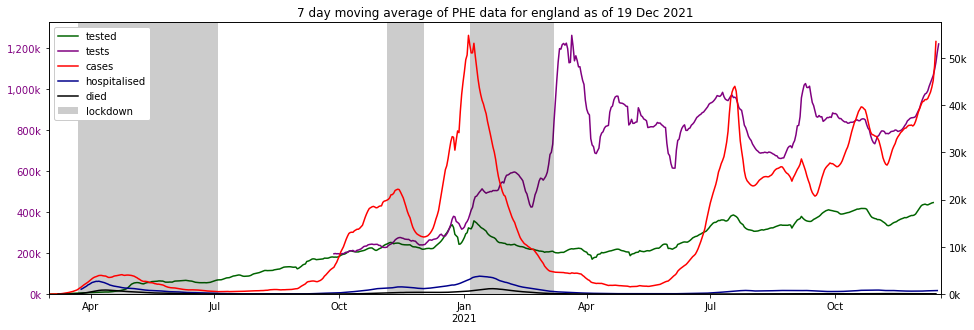

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))